# Algorithm 2.1
## Predictions and log marginal likelihood for Gaussian process regression

**Input**: X, y, k (coveriance function), $\sigma^2_n$ (noice level), $x_*$ (test input)

1. $L = \text{cholesky}(K + \sigma^2_n I)$
2. $\alpha = L^T \backslash (L \backslash y)$
3. $\bar{f}_* = k^T_* \cdot \alpha$
4. $v = L \backslash k_*$
5. $\mathbb{V}[f_*] = k(x, x_*) - v^Tv$
6. $\log p(y|x) = \frac{1}{2} y^T \alpha - \Sigma_i \log L_{ii} - \frac{n}{2} \log 2 \pi$
7. **return** $f_*$ (mean), $\mathbb{V}[f_*]$ (variance), log p(y|X) (log marginal likelihood)

Let's start by generating a simple data set to illustrate the algorithm above.

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Simple, non-linear data set')

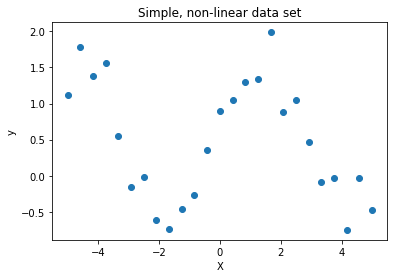

In [26]:
X = np.linspace(-5, 5, 25)

def f(x):
    return np.sin(x) + np.random.rand()

y = [f(x) for x in X]

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Simple, non-linear data set")

Let's use the radial basis function (or squared exponential kernel) for our covariance function $k$:

$k(x, x') = \sigma^2 \cdot \exp(- \frac{(x - x')^2}{2l^2})$

Note that it has 2 hyperparameters: $\sigma^2$ (output variance) and l (length scale).

In [27]:
def rbf(x1, x2, var, l):
    return var * np.exp(-(x1 - x2)**2 / 2 * l**2)